# WORKflow CRISP-DM
most common methodology for data mining, analytics, and data science projects.


# Business Understanding


we have : 
- "**A large CSV dataset** - 346,000 California state purchase records with 30+ fields"
- "**Two document files** - A data dictionary PDF and an acquisition methods guide DOCX"
- "**User needs** - People want to ask questions in natural language, not write MongoDB queries"

### Users want to ask questions like:

- **'What is an LPA Number?'** - Requires document search
- **'How many purchases used LPA contracts?'** - Requires database query
- **'Explain acquisition types and show spending per type'** - Requires BOTH!"



# Data Understanding

In [2]:
import pymongo
import pandas as pd
import json 
import numpy as np

In [176]:
df = pd.read_csv("data/purchase_order_data_ca.csv")

In [177]:
df_info = pd.DataFrame({
    'Column': df.columns,
    'Data Type': df.dtypes.values,
    'Non-Null Count': df.count().values,
    'Null Count': df.isnull().sum().values
})
print(df_info.to_string(index=False))


                 Column Data Type  Non-Null Count  Null Count
          Creation Date    object          346018           0
          Purchase Date    object          328582       17436
            Fiscal Year    object          346018           0
             LPA Number    object           92345      253673
  Purchase Order Number    object          346018           0
     Requisition Number    object           14369      331649
       Acquisition Type    object          346018           0
   Sub-Acquisition Type    object           68337      277681
     Acquisition Method    object          346018           0
 Sub-Acquisition Method    object           30896      315122
        Department Name    object          346018           0
          Supplier Code   float64          345982          36
          Supplier Name    object          345982          36
Supplier Qualifications    object          141745      204273
      Supplier Zip Code    object          275908       70110
        

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346018 entries, 0 to 346017
Data columns (total 31 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Creation Date            346018 non-null  object 
 1   Purchase Date            328582 non-null  object 
 2   Fiscal Year              346018 non-null  object 
 3   LPA Number               92345 non-null   object 
 4   Purchase Order Number    346018 non-null  object 
 5   Requisition Number       14369 non-null   object 
 6   Acquisition Type         346018 non-null  object 
 7   Sub-Acquisition Type     68337 non-null   object 
 8   Acquisition Method       346018 non-null  object 
 9   Sub-Acquisition Method   30896 non-null   object 
 10  Department Name          346018 non-null  object 
 11  Supplier Code            345982 non-null  float64
 12  Supplier Name            345982 non-null  object 
 13  Supplier Qualifications  141745 non-null  object 
 14  Supp

In [179]:
df.describe()

,Supplier Code,Quantity,Normalized UNSPSC,Class,Family,Segment
count,3.459820e+05,3.459880e+05,3.450010e+05,3.427230e+05,3.427230e+05,3.427230e+05
mean,8.434345e+05,2.316154e+03,4.932197e+07,4.927633e+07,4.927219e+07,4.913283e+07
std,2.461186e+06,1.058259e+05,2.246967e+07,2.246105e+07,2.246430e+07,2.246636e+07
min,0.000000e+00,1.000000e-04,3.018170e+05,1.010150e+07,3.018000e+06,1.000000e+07
25%,2.729200e+04,1.000000e+00,3.911171e+07,3.911160e+07,3.911000e+07,3.900000e+07
50%,1.012531e+06,1.000000e+00,4.412160e+07,4.412150e+07,4.412000e+07,4.400000e+07
75%,1.482180e+06,6.000000e+00,7.210151e+07,7.116110e+07,7.116000e+07,7.100000e+07
max,9.548318e+08,2.000000e+07,9.514190e+07,9.514190e+07,9.514000e+07,9.500000e+07


In [180]:
df.describe(include='O')

,Creation Date,Purchase Date,Fiscal Year,LPA Number,Purchase Order Number,Requisition Number,Acquisition Type,Sub-Acquisition Type,Acquisition Method,Sub-Acquisition Method,...,Item Name,Item Description,Unit Price,Total Price,Classification Codes,Commodity Title,Class Title,Family Title,Segment Title,Location
count,346018,328582,346018,92345,346018,14369,346018,68337,346018,30896,...,345986,345816,345988,345988,345001,342723,342723,342723,342723,275908
unique,1015,2268,3,1420,200533,5997,5,25,20,16,...,180029,219508,128167,150305,46049,13220,2360,411,56,3993
top,06/27/2014,07/01/2014,2013-2014,7-11-51-02,4500211314,REQ0008872,NON-IT Goods,Personal Services,Informal Competitive,Fleet,...,Medical Supplies,confidential,$0.00,$0.00,15101506,Gasoline or Petrol,Petroleum and distillates,Office machines and their supplies and accesso...,Information Technology Broadcasting and Teleco...,"95691\n(38.575311, -121.560401)"
freq,1534,4499,120636,9267,602,123,215083,16104,82083,14148,...,2916,1637,7552,7519,12679,12776,14584,16479,32681,11095


In [181]:

# Missing values analysis
print("\n6. Missing Values Analysis:")
print("-" * 70)
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': df.isnull().sum().values,
    'Missing Percentage': (df.isnull().sum().values / len(df) * 100).round(2)
})
missing_data = missing_data[missing_data['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
if len(missing_data) > 0:
    print(missing_data.to_string(index=False))
else:
    print("No missing values found!")



6. Missing Values Analysis:
----------------------------------------------------------------------
                 Column  Missing Count  Missing Percentage
     Requisition Number         331649               95.85
 Sub-Acquisition Method         315122               91.07
   Sub-Acquisition Type         277681               80.25
             LPA Number         253673               73.31
Supplier Qualifications         204273               59.04
      Supplier Zip Code          70110               20.26
               Location          70110               20.26
          Purchase Date          17436                5.04
          Segment Title           3295                0.95
            Class Title           3295                0.95
           Family Title           3295                0.95
                Segment           3295                0.95
                  Class           3295                0.95
                 Family           3295                0.95
        Commodi

# Data Preparation

## col cleaning 
- rename col 
- check col data types 
- split or aggergate columns 

In [182]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

In [183]:
df.columns= df.columns.str.replace('-', '_' )

In [184]:
df.dtypes

creation_date               object
purchase_date               object
fiscal_year                 object
lpa_number                  object
purchase_order_number       object
requisition_number          object
acquisition_type            object
sub_acquisition_type        object
acquisition_method          object
sub_acquisition_method      object
department_name             object
supplier_code              float64
supplier_name               object
supplier_qualifications     object
supplier_zip_code           object
calcard                     object
item_name                   object
item_description            object
quantity                   float64
unit_price                  object
total_price                 object
classification_codes        object
normalized_unspsc          float64
commodity_title             object
class                      float64
class_title                 object
family                     float64
family_title                object
segment             

In [185]:
# handle date columns 

date_columns = ['creation_date','purchase_date']

for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce' )

In [186]:
df['quantity'].dtype

dtype('float64')

In [188]:
# handle numeric columns 
df['quantity'] = df['quantity'].astype(str).str.replace(',', '').str.strip().str.replace('(','').str.replace(')','').str.replace('-', '').str.replace('nan','0')
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')
df['unit_price'] = df['unit_price'].astype(str).str.replace(',', '').str.replace('$', '').str.strip().str.replace('(','').str.replace(')','').str.replace('-', '').str.replace('nan','0')
df['unit_price'] = pd.to_numeric(df['unit_price'], errors='coerce')
df['total_price'] = df['total_price'].astype(str).str.replace(',', '').str.replace('$', '').str.strip().str.replace('(','').str.replace(')','').str.replace('-', '').str.replace('nan','0')
df['total_price'] = pd.to_numeric(df['total_price'], errors='coerce')

In [189]:
df['total_price']= df['total_price'].fillna(0)

df['quantity']= df['quantity'].fillna(0)
df['unit_price']= df['unit_price'].fillna(0)

In [190]:
# handle categorical columns
categorical_columns = [ 'acquisition_type', 'sub_acquisition_type', 'acquisition_method','sub_acquisition_method','department_name']
for col in categorical_columns:
    df[col] = df[col].astype('str').fillna('Unknown')
    df[col] = df[col].str.replace('nan', 'Unknown').str.strip()



In [191]:
# handle boolean columns
df['calcard']= df['calcard'].astype(str).str.lower().map({'yes': True, 'no': False ,'y': True, 'n':False})

In [192]:
#handle str col 
string_columns = [
    'lpa_number',
    'purchase_order_number',
    'requisition_number',
    'supplier_code',
    'supplier_name',
    'supplier_qualifications',
    'item_name',
    'item_description',
    'classification_codes',
    'commodity_title',
    'class_title',
    'family_title',
    'segment_title',
    'location'
]
for col in string_columns:
    df[col] = df[col].astype(str).str.strip()
    df[col] = df[col].replace('nan', 'Unknown')
    df[col] = df[col].fillna('Unknown')
# Final check for missing values



In [193]:
# handling code columns 
code_columns = ['normalized_unspsc', 'class', 'family', 'segment','supplier_zip_code']
for col in code_columns:
    df[col] = df[col].astype(str).str.strip()
    df[col]= df[col].replace('nan', '0')
    df[col]= df[col].fillna('0')



    





In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346018 entries, 0 to 346017
Data columns (total 31 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   creation_date            346018 non-null  datetime64[ns]
 1   purchase_date            328556 non-null  datetime64[ns]
 2   fiscal_year              346018 non-null  object        
 3   lpa_number               346018 non-null  object        
 4   purchase_order_number    346018 non-null  object        
 5   requisition_number       346018 non-null  object        
 6   acquisition_type         346018 non-null  object        
 7   sub_acquisition_type     346018 non-null  object        
 8   acquisition_method       346018 non-null  object        
 9   sub_acquisition_method   346018 non-null  object        
 10  department_name          346018 non-null  object        
 11  supplier_code            346018 non-null  object        
 12  supplier_name   

## Row cleaning 
- Remove duplacted rows 
- check for missing 
- check for illogocal value 

In [195]:
# Missing values analysis
print("\n6. Missing Values Analysis:")
print("-" * 70)
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': df.isnull().sum().values,
    'Missing Percentage': (df.isnull().sum().values / len(df) * 100).round(2)
})
missing_data = missing_data[missing_data['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
if len(missing_data) > 0:
    print(missing_data.to_string(index=False))
else:
    print("No missing values found!")



6. Missing Values Analysis:
----------------------------------------------------------------------
       Column  Missing Count  Missing Percentage
purchase_date          17462                5.05


## prepare data to mongodb 

In [200]:
df_mongo = df.copy()


In [201]:
df_mongo

,creation_date,purchase_date,fiscal_year,lpa_number,purchase_order_number,requisition_number,acquisition_type,sub_acquisition_type,acquisition_method,sub_acquisition_method,...,classification_codes,normalized_unspsc,commodity_title,class,class_title,family,family_title,segment,segment_title,location
0,2013-08-27,NaT,2013-2014,7-12-70-26,REQ0011118,REQ0011118,IT Goods,Unknown,WSCA/Coop,Unknown,...,Unknown,0,Unknown,0,Unknown,0,Unknown,0,Unknown,Unknown
1,2014-01-29,NaT,2013-2014,Unknown,REQ0011932,REQ0011932,NON-IT Goods,Unknown,Informal Competitive,Unknown,...,76121504,76121504.0,Unknown,0,Unknown,0,Unknown,0,Unknown,Unknown
2,2013-11-01,NaT,2013-2014,Unknown,REQ0011476,REQ0011476,IT Services,Unknown,Informal Competitive,Unknown,...,Unknown,0,Unknown,0,Unknown,0,Unknown,0,Unknown,"95841\n(38.662263, -121.346136)"
3,2014-06-13,2014-06-05,2013-2014,Unknown,4500236642,Unknown,NON-IT Goods,Unknown,Informal Competitive,Unknown,...,Unknown,0,Unknown,0,Unknown,0,Unknown,0,Unknown,"91436\n(34.151642, -118.49051)"
4,2014-03-12,2014-03-12,2013-2014,1-10-75-60A,4500221028,Unknown,NON-IT Goods,Unknown,Statewide Contract,Unknown,...,44103127,44103127.0,Unknown,0,Unknown,0,Unknown,0,Unknown,"95814\n(38.580427, -121.494396)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346013,2014-11-03,2014-09-25,2014-2015,Unknown,4500252536,Unknown,NON-IT Goods,Unknown,Informal Competitive,Unknown,...,93131608,93131608.0,Food supply services,93131600.0,Food and nutrition policy planning and programs,93130000.0,Humanitarian aid and relief,93000000.0,Politics and Civic Affairs Services,"95811\n(38.581053, -121.488564)"
346014,2014-08-14,2011-07-20,2014-2015,Unknown,10A1343,Unknown,NON-IT Services,Expert Witneses,Services are specifically exempt by statute,Unknown,...,80121903,80121903.0,Expert witness service,80121900.0,Compensated legal participation services,80120000.0,Legal services,80000000.0,Management and Business Professionals and Admi...,"95816\n(38.57219, -121.467691)"
346015,2014-05-09,NaT,2013-2014,Unknown,228,Unknown,IT Goods,Unknown,SB/DVBE Option,Unknown,...,45111609\n56101710,45111609.0,Multimedia projectors,45111600.0,Projectors and supplies,45110000.0,Audio and visual presentation and composing eq...,45000000.0,Printing and Photographic and Audio and Visual...,"95829\n(38.474725, -121.340819)"
346016,2014-01-14,2014-01-14,2013-2014,Unknown,P1300614,Unknown,NON-IT Goods,Unknown,Fair and Reasonable,Unknown,...,27112718,27112718.0,Engravers,27112700.0,Power tools,27110000.0,Hand tools,27000000.0,Tools and General Machinery,"95630\n(38.670213, -121.147592)"


In [235]:
# Convert datetime to Python datetime
df_mongo['purchase_date'] = df_mongo['purchase_date'].apply(lambda x: x.to_pydatetime() if pd.notnull(x) else None)
df_mongo['creation_date'] = df_mongo['creation_date'].apply(lambda x: x.to_pydatetime() if pd.notnull(x) else None)

# replace NaT values with None
df_mongo['purchase_date'] = df_mongo['purchase_date'].replace({pd.NaT: None, np.datetime64('NaT'): None})


In [236]:
df_mongo

,creation_date,purchase_date,fiscal_year,lpa_number,purchase_order_number,requisition_number,acquisition_type,sub_acquisition_type,acquisition_method,sub_acquisition_method,...,classification_codes,normalized_unspsc,commodity_title,class,class_title,family,family_title,segment,segment_title,location
0,2013-08-27,None,2013-2014,7-12-70-26,REQ0011118,REQ0011118,IT Goods,Unknown,WSCA/Coop,Unknown,...,Unknown,0,Unknown,0,Unknown,0,Unknown,0,Unknown,Unknown
1,2014-01-29,None,2013-2014,Unknown,REQ0011932,REQ0011932,NON-IT Goods,Unknown,Informal Competitive,Unknown,...,76121504,76121504.0,Unknown,0,Unknown,0,Unknown,0,Unknown,Unknown
2,2013-11-01,None,2013-2014,Unknown,REQ0011476,REQ0011476,IT Services,Unknown,Informal Competitive,Unknown,...,Unknown,0,Unknown,0,Unknown,0,Unknown,0,Unknown,"95841\n(38.662263, -121.346136)"
3,2014-06-13,2014-06-05 00:00:00,2013-2014,Unknown,4500236642,Unknown,NON-IT Goods,Unknown,Informal Competitive,Unknown,...,Unknown,0,Unknown,0,Unknown,0,Unknown,0,Unknown,"91436\n(34.151642, -118.49051)"
4,2014-03-12,2014-03-12 00:00:00,2013-2014,1-10-75-60A,4500221028,Unknown,NON-IT Goods,Unknown,Statewide Contract,Unknown,...,44103127,44103127.0,Unknown,0,Unknown,0,Unknown,0,Unknown,"95814\n(38.580427, -121.494396)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346013,2014-11-03,2014-09-25 00:00:00,2014-2015,Unknown,4500252536,Unknown,NON-IT Goods,Unknown,Informal Competitive,Unknown,...,93131608,93131608.0,Food supply services,93131600.0,Food and nutrition policy planning and programs,93130000.0,Humanitarian aid and relief,93000000.0,Politics and Civic Affairs Services,"95811\n(38.581053, -121.488564)"
346014,2014-08-14,2011-07-20 00:00:00,2014-2015,Unknown,10A1343,Unknown,NON-IT Services,Expert Witneses,Services are specifically exempt by statute,Unknown,...,80121903,80121903.0,Expert witness service,80121900.0,Compensated legal participation services,80120000.0,Legal services,80000000.0,Management and Business Professionals and Admi...,"95816\n(38.57219, -121.467691)"
346015,2014-05-09,None,2013-2014,Unknown,228,Unknown,IT Goods,Unknown,SB/DVBE Option,Unknown,...,45111609\n56101710,45111609.0,Multimedia projectors,45111600.0,Projectors and supplies,45110000.0,Audio and visual presentation and composing eq...,45000000.0,Printing and Photographic and Audio and Visual...,"95829\n(38.474725, -121.340819)"
346016,2014-01-14,2014-01-14 00:00:00,2013-2014,Unknown,P1300614,Unknown,NON-IT Goods,Unknown,Fair and Reasonable,Unknown,...,27112718,27112718.0,Engravers,27112700.0,Power tools,27110000.0,Hand tools,27000000.0,Tools and General Machinery,"95630\n(38.670213, -121.147592)"


In [237]:
# convert all NAN or NAT to None for mongodb
df_mongo = df_mongo.where(pd.notnull(df_mongo), None)

In [238]:
# Convert to records
records = df_mongo.to_dict(orient='records')

In [ ]:
print(f"\n Prepared {len(records):,} records for MongoDB")



✓ Prepared 346,018 records for MongoDB


## Upload records to MongoDB

In [3]:
client = pymongo.MongoClient('mongodb://localhost:27017/')
db = client['california_purchases']
collection = db['purchases']


In [242]:
print(f"\n✓ Connected to MongoDB")
print(f"  Database: {db.name}")
print(f"  Collection: {collection.name}")



✓ Connected to MongoDB
  Database: california_purchases
  Collection: purchases


In [243]:
## upload records to MongoDB by batching to avoid memory issues 
batch_size = 1000
for i in range(0, len(records), batch_size):
    batch = records[i:i + batch_size]
    collection.insert_many(batch)
    print(f"  ✓ Inserted records {i + 1} to {i + len(batch)}")

  ✓ Inserted records 1 to 1000
  ✓ Inserted records 1001 to 2000
  ✓ Inserted records 2001 to 3000
  ✓ Inserted records 3001 to 4000
  ✓ Inserted records 4001 to 5000
  ✓ Inserted records 5001 to 6000
  ✓ Inserted records 6001 to 7000
  ✓ Inserted records 7001 to 8000
  ✓ Inserted records 8001 to 9000
  ✓ Inserted records 9001 to 10000
  ✓ Inserted records 10001 to 11000
  ✓ Inserted records 11001 to 12000
  ✓ Inserted records 12001 to 13000
  ✓ Inserted records 13001 to 14000
  ✓ Inserted records 14001 to 15000
  ✓ Inserted records 15001 to 16000
  ✓ Inserted records 16001 to 17000
  ✓ Inserted records 17001 to 18000
  ✓ Inserted records 18001 to 19000
  ✓ Inserted records 19001 to 20000
  ✓ Inserted records 20001 to 21000
  ✓ Inserted records 21001 to 22000
  ✓ Inserted records 22001 to 23000
  ✓ Inserted records 23001 to 24000
  ✓ Inserted records 24001 to 25000
  ✓ Inserted records 25001 to 26000
  ✓ Inserted records 26001 to 27000
  ✓ Inserted records 27001 to 28000
  ✓ Inserted r

# Modeling

## 🧩 Agentic RAG
- I will Implement **the Agentic Rag** using the following ref:  
### 📚 References

1. https://www.mongodb.com/docs/atlas/ai-integrations/langchain/local-rag/ 
2. https://www.youtube.com/watch?v=v5V3W-NNSQw&t=211s 
3. https://www.youtube.com/watch?v=M_5bgAMuqGM 

### 🖼️ Illustration
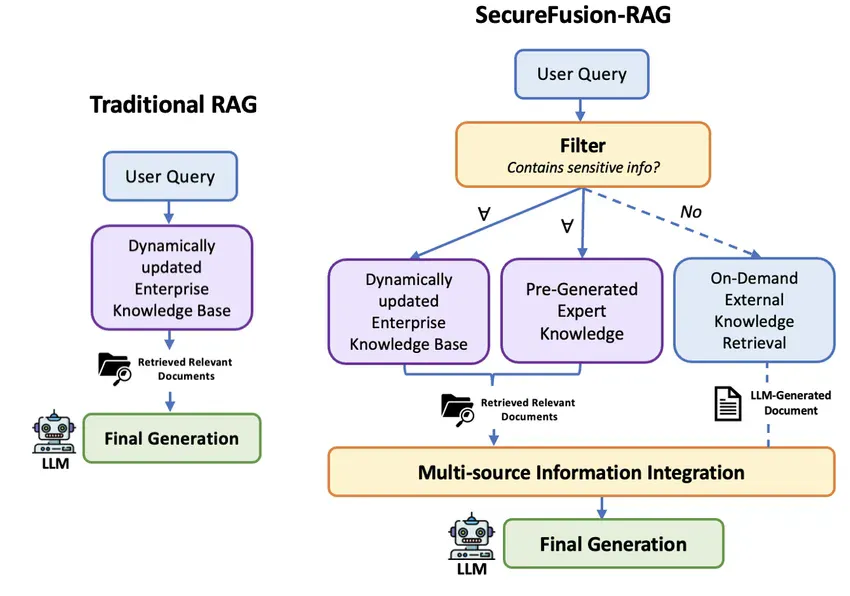


### step 1 :  Load documents 
- Read pdf (Data dictionary)
- Read docs ( Aquistion Methods)



In [4]:
from docx import Document
import PyPDF2


In [5]:
PDF_PATH = "data\Data_dictionary.pdf"
DOCX_PATH = "data\Purchase_Order_Acquistion_Methods.docx"


In [6]:
# Read pdf file
def read_pdf(file_path):
    pdf_text = ""
    try:
        with open(file_path, 'rb') as file:
            reader = PyPDF2.PdfReader(file)
            for page in reader.pages:
                pdf_text += page.extract_text() + "\n"
        return pdf_text
    except Exception as e:
        print(f"Error reading PDF file: {e}")
        return ""

In [7]:
# Read docs file 

def read_docx(file_path):
    doc_text = ""
    try:
        doc = Document(file_path)
        for para in doc.paragraphs:
            doc_text += para.text + "\n"
        doc_text += "below table contains : Acquisition Method, Abbreviation ,   Description \n"
        for table in doc.tables:
            for row in table.rows:
                for cell in row.cells:
                    doc_text += cell.text + "\t"
                doc_text += "\n"
            doc_text += "\n"
        return doc_text
    except Exception as e:
        print(f"Error reading DOCX file: {e}")
        return ""

In [8]:
# Load documents
pdf_text = read_pdf(PDF_PATH)
docx_text = read_docx(DOCX_PATH)


In [9]:
# Combine all text
all_text = f"""
{pdf_text}

{docx_text}
"""

print(f" Total text loaded: {len(all_text):,} characters")


 Total text loaded: 9,557 characters


### Step 2: Split Text into Chunks

In this step, I used **RecursiveCharacterTextSplitter**, following this tutorial:  
 [YouTube Tutorial](https://www.youtube.com/watch?v=v5V3W-NNSQw&t=211s)


####  What It Does
The **RecursiveCharacterTextSplitter** divides large text into smaller chunks **while maintaining context** by overlapping sections of text.  
This approach is especially useful for large documents, ensuring that **important information isn't lost** during splitting.


####  Why Splitting Matters
- **LLMs have token limits** — they can only process a certain amount of text at once.  
- **Smaller chunks = more accurate retrieval**.  
- Each chunk should ideally contain **one complete idea**.  


####  How It Works
1. **Split by paragraph** first.  
2. If a paragraph is too long, **split by sentences**.  
3. **Keep some overlap** between chunks to preserve context.



*In simple terms:*  
This method ensures that when the model reads or retrieves information, it has enough context to understand each part of the document accurately.


In [10]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
chunk_size=1000
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=0.15 * chunk_size,
    length_function=len,
    separators=["\n\n", "\n", " ", ""]
)
chunks = text_splitter.split_text(all_text)


In [11]:
print(f"  Created {len(chunks)} text chunks")
print(f"  Average chunk size: {sum(len(c) for c in chunks) / len(chunks):.0f} characters")
print(f"\nExample chunk (first 800 chars):")
print(chunks[0][:802] + "...")


  Created 13 text chunks
  Average chunk size: 802 characters

Example chunk (first 800 chars):
Field Name Field Description
Creation Date System Date
Purchase DateDate of purchase order is entered by the user.  This date can be back dated; therefore the 
creation date is primarily used
Fiscal YearFiscal year derived based on creation date. State of California fiscal year starts on July 1 
and ends on June 30
LPA NumberLeveraged Procurement Agreement (LPA) Number, aka Contract Number.  If there is a 
contract number in this field, the amount is considered contract spend
Purchase Order NumberPurchase Order Number, numbers are not unique, different departments can have same 
purchase order number
Requisition NumberRequisition Number, numbers are not unique, different departments can have same 
purchase order number
Acquisition Type Type of Acquisition: Non-IT Goods, Non-IT Services, IT G...



### step 3: Create vectore embeddings

#### why embeddings ? 
- convert text > numbers 
- similat text > similar vectors
- then fast search similarity 
- find relevant chencks quickly 
- uses cosine simalarity between vectorts 
- why I  used the cosine similarity ? 
### comparison_table 


| Use Case            | Best Metric | Why                        | Example           |
|----------------------|-------------|-----------------------------|-------------------|
| Text search / RAG    | **Cosine**  | Meaning matters, not length | “Find similar documents” |
| Image similarity     | **Cosine**  | Color/features, not brightness | “Similar faces” |
| Geographic distance  | **Euclidean** | Actual distance matters    | “Nearest city” |
| Manhattan routing    | **Manhattan** | Grid-based movement        | “Taxi distance” |
| Exact matching       | **Hamming** | Bit differences             | “Error detection” |




### Ref
[lang chain & Google Generative AI documents](https://docs.langchain.com/oss/python/integrations/providers/google#google)
[ Rag Agent](https://docs.langchain.com/oss/javascript/langchain/rag#faiss)


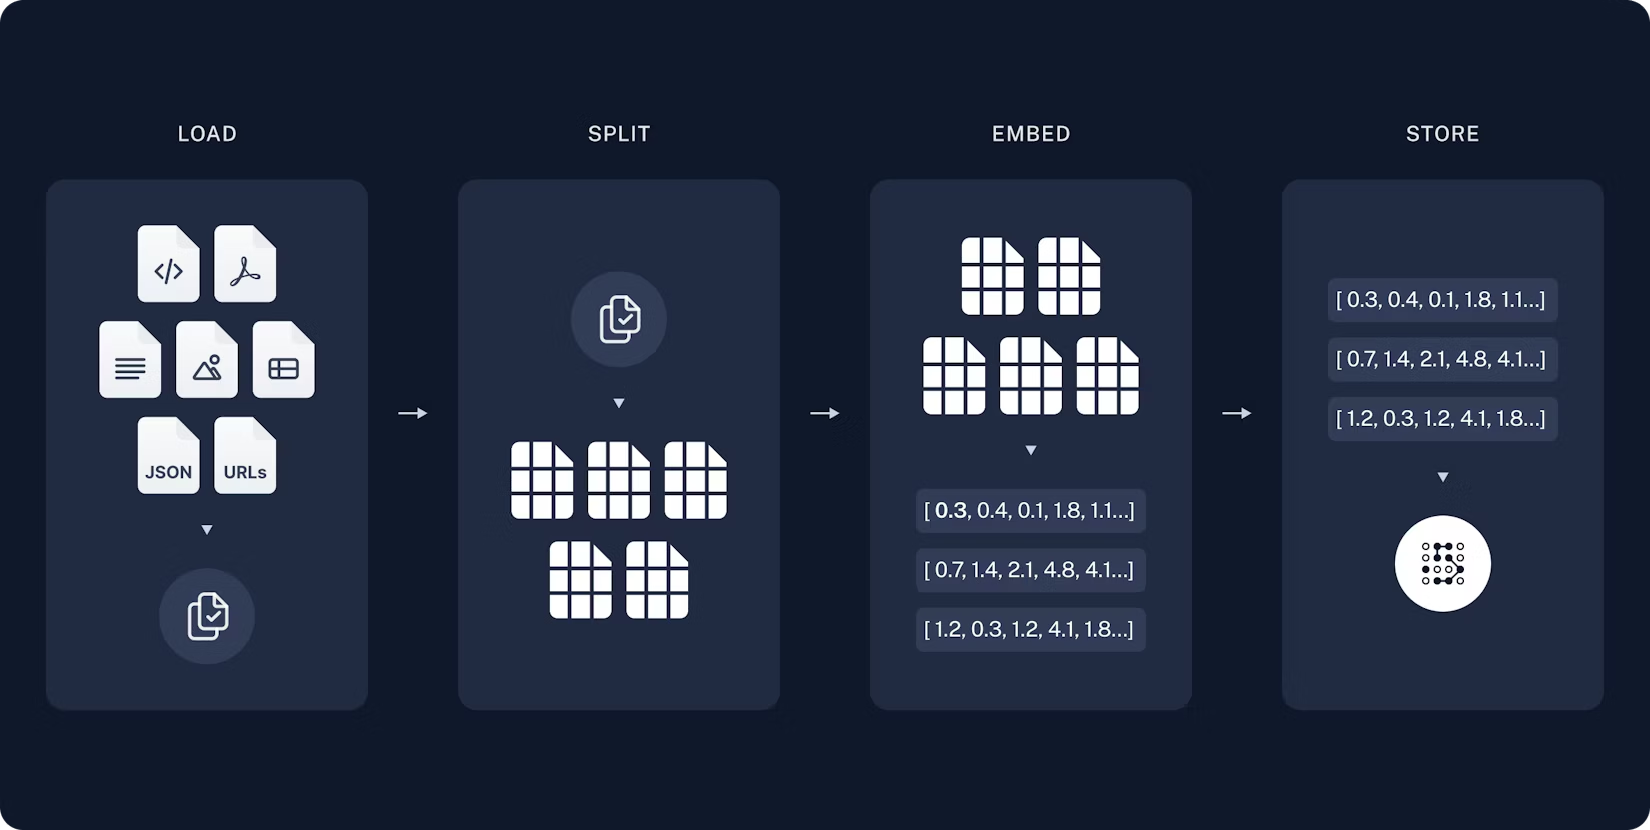




In [ ]:
from langchain_google_genai  import GoogleGenerativeAIEmbeddings
from langchain_community.vectorstores import FAISS



import os
os.environ["GOOGLE_API_KEY"] = ""
embeddings = GoogleGenerativeAIEmbeddings(model="models/gemini-embedding-001")
vector_store = FAISS.from_texts(chunks, embedding=embeddings)
test_query = "What are the acquisition methods for purchase orders in California?"
test_result = vector_store.similarity_search(test_query, k=2)
print(f"\nTop 2 similar chunks for query: '{test_query}'\n")
for i, chunk in enumerate(test_result, 1):
    print(f"--- Chunk {i} ---")
    print(chunk.page_content)
    print("-" * 40)








Top 2 similar chunks for query: 'What are the acquisition methods for purchase orders in California?'

--- Chunk 1 ---
The below table is a list of acquisition methods and their description.  For additional information including dollar thresholds please refer to SCM vol. 2 and 3 found at: http://www.dgs.ca.gov/pd/Resources/publications/SCM2.aspx
http://www.dgs.ca.gov/pd/Resources/publications/SCM3.aspx
----------------------------------------
--- Chunk 2 ---
below table contains : Acquisition Method, Abbreviation ,   Description 
Acquisition Method	Abbreviation	Description	
California Multiple Awards Schedule	CMAS	The CMAS program offers primarily Federal GSA multiple award schedule pricing with California terms and conditions with suppliers that provide nonIT goods and services, and IT goods and services.	
Community-based Rehabilitation Program	CRP
	In accordance with WIC 19404, exempt from competition by law; under control agency oversight.	
Emergency Purchase
		Exempt from competit

### STEP 4: CREATE TOOLs 



### why tools ? 
#### Quick Comparison:

| Approach     | Can Answer "What is LPA?" | Can Answer "How many LPA?" |
|--------------|---------------------------|----------------------------|
| Direct LLM   | ⚠️ Maybe (from training)   | ❌ No                      |
| Direct Query | ❌ No                     | ✅ Yes (but user must write code) |
| Simple RAG   | ✅ Yes                    | ❌ No (can't count)        |
| Tools        | ✅ Yes                   | ✅ Yes (automatically!)   |

#### Tools = The ONLY way to let LLM access the data intelligently

-  Natural language (user-friendly)
-  Multi-source access (documents + database)
-  Automatic decision (LLM chooses which tool)
-  Extensible (easy to add more tools)


### Ref 
- [tool Ref](https://docs.langchain.com/oss/python/langchain/tools)
- [How to Build a Finance AI Assistant in Python with MongoDB & LangGraph ](https://www.youtube.com/watch?v=iMUxXlVE-LE)



#### 4.1 create search tool

In [13]:
from langchain.tools import tool

@tool
def search_documents(query: str) -> str:
    """Search through the Data Dictionary and Acquisition Methods Guide.
    
    Use this for understanding field definitions, acquisition methods,
    procurement terminology, and explanations of codes or categories.
    
    Args:
        query: Search query (e.g., "What is LPA Number?")
    
    Returns:
        Relevant text from the documents
    """
    try:
        results = vector_store.similarity_search(query, k=3)
        combined_text = "\n\n--- Relevant Information ---\n\n"
        for i, doc in enumerate(results, 1):
            combined_text += f"[Source {i}]\n{doc.page_content}\n\n"
        return combined_text
    except Exception as e:
        return f"Error during search: {e}"


#### 4.2 CREATE MONGODB QUERY tool


In [14]:
import json, traceback

@tool
def query_database(query, operation: str = "count"):
    """
    query: either a JSON string or a Python dict/list.
    operation: 'count', 'aggregate', 'find', 'field_stats'
    """
    try:
        # Parse string input
        if isinstance(query, str):
            query_obj = json.loads(query) if query.strip() else {}
        else:
            query_obj = query or {}

        if operation == "aggregate":
            pipeline = query_obj if isinstance(query_obj, list) else [query_obj]
            # debug
            print("DEBUG aggregate pipeline:", pipeline[:3])
            results = list(collection.aggregate(pipeline))
            return {"results": results, "success": True}

        if operation == "count":
            print("DEBUG count query:", query_obj)
            cnt = collection.count_documents(query_obj)
            return {"results": cnt, "success": True}

        if operation == "find":
            print("DEBUG find query:", query_obj)
            docs = list(collection.find(query_obj).limit(10))
            return {"results": docs, "success": True}

        if operation == "field_stats":
            # query_obj expected: {"field":"Purchase Location", "limit":10}
            field = query_obj.get("field") if isinstance(query_obj, dict) else None
            if not field:
                return {"error": "field_stats requires {'field': '<field_name>'}", "success": False}
            pipeline = [
                {"$group": {"_id": f"${field}", "count": {"$sum": 1}}},
                {"$sort": {"count": -1}},
                {"$limit": query_obj.get("limit", 10)}
            ]
            print("DEBUG field_stats pipeline:", pipeline)
            res = list(collection.aggregate(pipeline))
            # Also report counts of null/missing and total
            total = collection.estimated_document_count()
            non_null = collection.count_documents({field: {"$exists": True, "$ne": None}})
            null_or_missing = total - non_null
            return {"results": res, "total": total, "non_null": non_null, "null_or_missing": null_or_missing, "success": True}

        return {"error": f"Unsupported operation: {operation}", "success": False}

    except Exception as e:
        return {"error": str(e), "traceback": traceback.format_exc(), "success": False}


query = json.dumps([
    {
        "$addFields": {
            "purchase_date_dt": { "$toDate": "$purchase_date" }
        }
    },
    {
        "$match": {
            "purchase_date_dt": {
                "$gte": { "$date": "2014-01-01T00:00:00Z" },
                "$lte": { "$date": "2014-03-31T23:59:59Z" }
            }
        }
    },
    {
        "$group": {
            "_id": None,
            "totalPrice": { "$sum": "$total_price" }
        }
    }
])

result = query_database(query, operation="aggregate")
print("Total Price Q1 2014:", result)

In [15]:
tools = [search_documents, query_database]

In [16]:
doc = collection.find_one()
print(doc.keys())


dict_keys(['_id', 'creation_date', 'purchase_date', 'fiscal_year', 'lpa_number', 'purchase_order_number', 'requisition_number', 'acquisition_type', 'sub_acquisition_type', 'acquisition_method', 'sub_acquisition_method', 'department_name', 'supplier_code', 'supplier_name', 'supplier_qualifications', 'supplier_zip_code', 'calcard', 'item_name', 'item_description', 'quantity', 'unit_price', 'total_price', 'classification_codes', 'normalized_unspsc', 'commodity_title', 'class', 'class_title', 'family', 'family_title', 'segment', 'segment_title', 'location'])


### STEP 5: CREATE Model

**createAgent** is built on the basic agent loop — calling a model, letting it choose tools to execute, and then finishing when it calls no more tools:
- 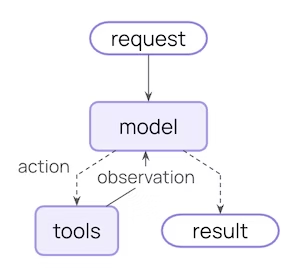

#### Ref
[create agent Ref](https://docs.langchain.com/oss/javascript/releases/langchain-v1)

In [17]:



from langchain.agents import create_agent
from datetime import datetime
from langchain_google_genai import ChatGoogleGenerativeAI




# Initialize LLM
llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",  # or "gemini-2.0-flash-exp"
    temperature=0,
    convert_system_message_to_human=True
)
print("Gemini LLM initialized")

# Create agent (returns CompiledStateGraph)
agent = create_agent(
    model=llm,
    tools=tools,
    system_prompt=f"""You are a helpful AI assistant for California state procurement data analysis .
    your are expert in knowledge of procurement data defention, acquisition methods, and data analysis 

CURRENT DATE: {datetime.now().strftime("%Y-%m-%d")}

YOU HAVE TWO POWERFUL TOOLS:

1. search_documents:
   - Search for definitions and explanations in the Data Dictionary and Acquisition Methods Guide
   - Get definitions, explanations, terminology
   - Use when user asks: "What is X?" "Explain Y" "Define Z" as profissional context

2. query_database:
   - Query MongoDB purchase records
   - Count, aggregate, analyze data
   - Use when user asks: "How many?" "Show me" "Calculate"
   - this the dictionary of fields in the database: ['_id', 'creation_date', 'purchase_date', 'fiscal_year', 'lpa_number', 'purchase_order_number', 'requisition_number', 'acquisition_type', 'sub_acquisition_type', 'acquisition_method', 'sub_acquisition_method', 'department_name', 'supplier_code', 'supplier_name', 'supplier_qualifications', 'supplier_zip_code', 'calcard', 'item_name', 'item_description', 'quantity', 'unit_price', 'total_price', 'classification_codes', 'normalized_unspsc', 'commodity_title', 'class', 'class_title', 'family', 'family_title', 'segment', 'segment_title', 'location']
SPECIAL INSTRUCTION:
- If a top-N result returns "Unknown" as the most frequent value, also report the count for "Unknown"
  and the second-most frequent value with its count.
  


STRATEGY FOR ANSWERING:

- For definitions → use search_documents
- For data/statistics → use query_database
- For complex questions → use BOTH tools and synthesize
- For profissional reports → use both tools to provide accurate and well-explained reports

IMPORTANT MONGODB TIPS:
- Field names have spaces: "Acquisition Type", "Department Name"
- Use double quotes in JSON: {{"field": "value"}}
- Boolean field for LPA: {{"has_lpa_number": true}}
- For top N, use aggregate with $group, $sort, $limit

RESPONSE STYLE:
- Be clear and concise and profissional
- Cite sources when using search_documents
- Show numbers clearly when using query_database
- If you use both tools, combine insights logically

Think step-by-step and provide accurate, helpful answers."""
)

print("agent created (CompiledStateGraph)")
print(f"  Type: {type(agent)}")



Gemini LLM initialized
agent created (CompiledStateGraph)
  Type: <class 'langgraph.graph.state.CompiledStateGraph'>


# Evaluation

In [18]:

def ask_question(question: str) -> str:
    """
    Ask a question to the Agentic RAG system.
    
    Args:
        question: User's question in natural language
        
    Returns:
        Agent's answer
    """
    try:
        # CORRECT: Invoke with proper input format
        result = agent.invoke({
            "messages": [{"role": "user", "content": question}]
        })

        print("Result : ", result)
        
        # Extract the final answer from result
        # Result is a dict with "messages" key
        if isinstance(result, dict) and "messages" in result:
            # Get the last message (agent's final response)
            messages = result["messages"]
            if messages:
                last_message = messages[-1]
                # Extract content
                if hasattr(last_message, 'content'):
                        # Check if content is a list (multiple parts) {'type': 'text', 'text': 'An answer'}
                        if isinstance(last_message.content, list):
                            # extract text from each part
                            return "\n".join(part.get("text", str(part)) for part in last_message.content)
                        else:
                            return last_message.content
                             
                elif isinstance(last_message, dict):
                    return last_message.get("content", str(last_message))
        
        # Fallback: return string representation
        return str(result)
    
    except Exception as e:
        import traceback
        return f"Error: {str(e)}\n\nTraceback:\n{traceback.format_exc()}"




In [19]:



# Example 1: Definition question
print("\n" + "="*80)
print("EXAMPLE 1: Definition Question")
print("="*80)
question1 = "What is an LPA Number?"
answer1 = ask_question(question1)
print("ANSWER:")
print(answer1)


EXAMPLE 1: Definition Question
Result :  {'messages': [HumanMessage(content='What is an LPA Number?', additional_kwargs={}, response_metadata={}, id='cdbc3ef3-9180-446f-8622-4c0ea0103bc8'), AIMessage(content='', additional_kwargs={'function_call': {'name': 'search_documents', 'arguments': '{"query": "What is LPA Number?"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'grounding_metadata': {}, 'model_provider': 'google_genai'}, id='lc_run--7f158880-a35c-431e-8726-d69706601813-0', tool_calls=[{'name': 'search_documents', 'args': {'query': 'What is LPA Number?'}, 'id': 'd3415990-f747-4593-aa78-73494cca6546', 'type': 'tool_call'}], usage_metadata={'input_tokens': 736, 'output_tokens': 84, 'total_tokens': 820, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 65}}), ToolMessage(content='\n\n--- Relevant Information ---\n\n[Source 1]\nSegmentC

In [20]:

# Example 2: analysis question
question1 = "Analysis of the most frequently ordered line items.."
answer1 = ask_question(question1)
print("ANSWER:")
print(answer1)

DEBUG aggregate pipeline: [{'$group': {'_id': '$item_name', 'count': {'$sum': 1}}}, {'$sort': {'count': -1}}, {'$limit': 10}]
Result :  {'messages': [HumanMessage(content='Analysis of the most frequently ordered line items..', additional_kwargs={}, response_metadata={}, id='26d95af6-32c9-42a9-896e-2114aaf0e01f'), AIMessage(content='', additional_kwargs={'function_call': {'name': 'query_database', 'arguments': '{"query": "\\n[\\n    {\\n        \\"$group\\": {\\n            \\"_id\\": \\"$item_name\\",\\n            \\"count\\": { \\"$sum\\": 1 }\\n        }\\n    },\\n    {\\n        \\"$sort\\": {\\n            \\"count\\": -1\\n        }\\n    },\\n    {\\n        \\"$limit\\": 10\\n    }\\n]\\n", "operation": "aggregate"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'grounding_metadata': {}, 'model_provider': 'google_genai'}, id='lc_run--6077bf61-d6e7-4cda-8c0a-4b

In [21]:
# Example 3: quarter identification question
question1 = "Identify of the quarter with the highest spending..."
answer1 = ask_question(question1)
print("ANSWER:")
print(answer1)

DEBUG aggregate pipeline: [{'$project': {'quarter': {'$switch': {'branches': [{'case': {'$in': [{'$month': '$purchase_date'}, [1, 2, 3]]}, 'then': 'Q1'}, {'case': {'$in': [{'$month': '$purchase_date'}, [4, 5, 6]]}, 'then': 'Q2'}, {'case': {'$in': [{'$month': '$purchase_date'}, [7, 8, 9]]}, 'then': 'Q3'}, {'case': {'$in': [{'$month': '$purchase_date'}, [10, 11, 12]]}, 'then': 'Q4'}], 'default': 'Unknown'}}, 'total_price': 1}}, {'$group': {'_id': '$quarter', 'total_spending': {'$sum': '$total_price'}}}, {'$sort': {'total_spending': -1}}]
Result :  {'messages': [HumanMessage(content='Identify of the quarter with the highest spending...', additional_kwargs={}, response_metadata={}, id='47535f1d-1c2a-4e21-9ac3-212bfe9d89d0'), AIMessage(content='', additional_kwargs={'function_call': {'name': 'query_database', 'arguments': '{"query": "\\n[\\n  {\\n    \\"$project\\": {\\n      \\"quarter\\": {\\n        \\"$switch\\": {\\n          \\"branches\\": [\\n            { \\"case\\": { \\"$in\\": [

In [22]:
# Example 5 : time period order count
question1 = "which year That mark hieghest total order num?"
answer1 = ask_question(question1)
print("ANSWER:")
print(answer1)

DEBUG aggregate pipeline: [{'$group': {'_id': '$fiscal_year', 'count': {'$sum': 1}}}, {'$sort': {'count': -1}}, {'$limit': 1}]
Result :  {'messages': [HumanMessage(content='which year That mark hieghest total order num?', additional_kwargs={}, response_metadata={}, id='8ad0770c-7ea7-44e4-8622-e4c0039d71d3'), AIMessage(content='', additional_kwargs={'function_call': {'name': 'query_database', 'arguments': '{"query": "\\n[\\n    {\\"$group\\": {\\"_id\\": \\"$fiscal_year\\", \\"count\\": {\\"$sum\\": 1}}},\\n    {\\"$sort\\": {\\"count\\": -1}},\\n    {\\"$limit\\": 1}\\n]\\n", "operation": "aggregate"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'grounding_metadata': {}, 'model_provider': 'google_genai'}, id='lc_run--f1a2d713-d6f9-4c82-ae4d-31f8c89773fc-0', tool_calls=[{'name': 'query_database', 'args': {'query': '\n[\n    {"$group": {"_id": "$fiscal_year", "count": 

In [23]:
print("EXAMPLE 6: Data Analysis Question")
question2 = "what is the most purchase location?"
answer2 = ask_question(question2)
print("\n" + "-"*80)
print("ANSWER:")
print(answer2)

print("EXAMPLE 7: Combined Question")
question3 = "How many purchase made under Emergency Purchase and what is Emergency purchase?  "
answer3 = ask_question(question3)
print("ANSWER:")
print(answer3)


print("EXAMPLE 8: Professional Report Question")
question4 = "Provide a professional report on the top 5 acquisition methods used in California purchase orders, including their definitions and the number of purchases for each method."
answer4 = ask_question(question4)
print("ANSWER:")
print(answer4)


EXAMPLE 6: Data Analysis Question
DEBUG aggregate pipeline: [{'$group': {'_id': '$location', 'count': {'$sum': 1}}}, {'$sort': {'count': -1}}, {'$limit': 1}]
DEBUG aggregate pipeline: [{'$group': {'_id': '$location', 'count': {'$sum': 1}}}, {'$sort': {'count': -1}}, {'$skip': 1}]
Result :  {'messages': [HumanMessage(content='what is the most purchase location?', additional_kwargs={}, response_metadata={}, id='bdb7efd0-b485-46df-9d1d-0c6184f7daf5'), AIMessage(content='', additional_kwargs={'function_call': {'name': 'query_database', 'arguments': '{"query": "\\n[\\n    {\\"$group\\": {\\"_id\\": \\"$location\\", \\"count\\": {\\"$sum\\": 1}}},\\n    {\\"$sort\\": {\\"count\\": -1}},\\n    {\\"$limit\\": 1}\\n]\\n", "operation": "aggregate"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'grounding_metadata': {}, 'model_provider': 'google_genai'}, id='lc_run--7dc677b1-c31

# Deployment


In [24]:

def ask_question(question: str) -> str:
    """
    Ask a question to the Agentic RAG system.
    
    Args:
        question: User's question in natural language
        
    Returns:
        Agent's answer
    """
    try:
        # CORRECT: Invoke with proper input format
        result = agent.invoke({
            "messages": [{"role": "user", "content": question}]
        })

        
        # Extract the final answer from result
        # Result is a dict with "messages" key
        if isinstance(result, dict) and "messages" in result:
            # Get the last message (agent's final response)
            messages = result["messages"]
            if messages:
                last_message = messages[-1]
                # Extract content
                if hasattr(last_message, 'content'):
                        # Check if content is a list (multiple parts) {'type': 'text', 'text': 'An answer'}
                        if isinstance(last_message.content, list):
                            # extract text from each part
                            return "\n".join(part.get("text", str(part)) for part in last_message.content)
                        else:
                            return last_message.content
                             
                elif isinstance(last_message, dict):
                    return last_message.get("content", str(last_message))
        
        # Fallback: return string representation
        return str(result)
    
    except Exception as e:
        import traceback
        return f"Error: {str(e)}\n\nTraceback:\n{traceback.format_exc()}"




In [27]:
def interactive_mode():
    """Interactive question-answering mode"""
    print("\n" + "="*80)
    print("INTERACTIVE AGENTIC RAG")
    print("="*80)
    print("""
Ask questions about California state procurement!

EXAMPLE QUESTIONS:
  📚 "What is a requisition number?"
  📊 "How many IT purchases were made?"
  📈 "provide with the profissional report the top 5 departments by spending?"

Type 'exit' to quit.
    """)
    
    while True:
        try:
            question = input("\n❓ Your question: ").strip()
            
            if question.lower() in ['exit', 'quit', 'q']:
                print("\nGoodbye! 👋")
                break
            
            if not question:
                continue
            
            # Use streaming for better UX
            print("\n💭 Thinking...\n")
            answer = ask_question(question)
            
            print("\n" + "="*80)
            print("💡 ANSWER:")
            print("="*80)
            print(answer)
            
        except KeyboardInterrupt:
            print("\n\nGoodbye! 👋")
            break
        except Exception as e:
            print(f"\n❌ Error: {str(e)}")



In [28]:
interactive_mode()


INTERACTIVE AGENTIC RAG

Ask questions about California state procurement!

EXAMPLE QUESTIONS:
  📚 "What is a requisition number?"
  📊 "How many IT purchases were made?"
  📈 "provide with the profissional report the top 5 departments by spending?"

Type 'exit' to quit.
    

💭 Thinking...


💡 ANSWER:
A Requisition Number is a number used to identify a specific requisition. It's important to note that these numbers are not unique across different departments, meaning multiple departments can have the same requisition number.

💭 Thinking...

DEBUG count query: {'$or': [{'segment_title': {'$options': 'i', '$regex': 'IT'}}, {'segment_title': {'$options': 'i', '$regex': 'Information Technology'}}]}

💡 ANSWER:
There were 106,941 IT purchases made.

💭 Thinking...

DEBUG aggregate pipeline: [{'$group': {'_id': '$department_name', 'total_spending': {'$sum': '$total_price'}}}, {'$sort': {'total_spending': -1}}, {'$limit': 5}]

💡 ANSWER:
Here is a professional report on the top 5 departments by 